In [19]:
from pathlib import Path
import lasio
import matplotlib.pyplot as plt
import csv
import numpy as np

## Loading all LAS files in Data\LASs
### counting total number of LAS files
### Extract first 10 well logs headers, as save as a txt for Shelle

In [2]:
input_path = "Data\\LASs"
prefix = "*.las"
files = sorted(Path(input_path).glob(prefix))
#print(files)
total_files = 0
list_of_LAS_files = []
for fp in files:
    #print(fp.resolve())
    list_of_LAS_files.append(str(fp.resolve()))
    total_files += 1
print(f"Total {total_files} LAS files in {input_path}")

Total 29 LAS files in Data\LASs


In [14]:
# Pick a log file, n = 0 -- 28"
n = 0
las_file = list_of_LAS_files[n]
print(las_file)
las =  lasio.read(las_file)
well_info = las.well.dictview()
curves = las.curves
params =  las.params
print("\n")
print(f"Available curves in {well_info["WELL"]}")
print(curves)

C:\Users\Chuen-Song.Chen\Log-nificent-Minds\Data\LASs\MBRNE-10H1_RDL_WPT_FirstExport.las


Available curves in MBRNE-10H1
Mnemonic  Unit      Value  Description                                                                          
--------  ----      -----  -----------                                                                          
MD        m                {F}                                                                                  
BADHOLE   unitless         Badhole Flag {F}                                                                     
BS        in               (RT)    (Borehole)              (6in)                   Bit Size {F}                 
CALI      in               (LDS-C)                 (1in)                   Caliper {F}                          
DEN       g/cm3            Corrected Bulk Density {F}                                                           
DENC      g/cm3            (LDS-C)                 (6in)                   Bulk Density

In [25]:
curve_data = las[curve_name]
curve_data

array([nan, nan, nan, ..., nan, nan, nan])

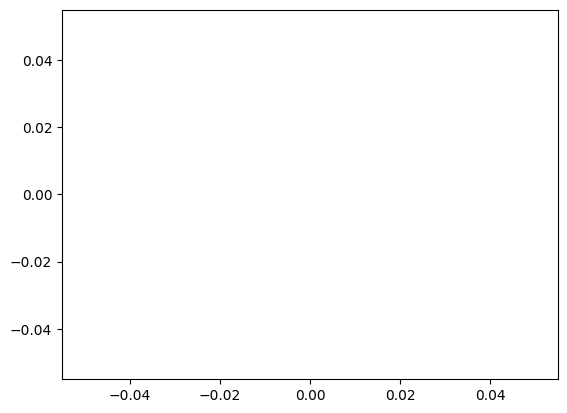

In [21]:
plt.plot(curve_data, depth, label=curve_name)

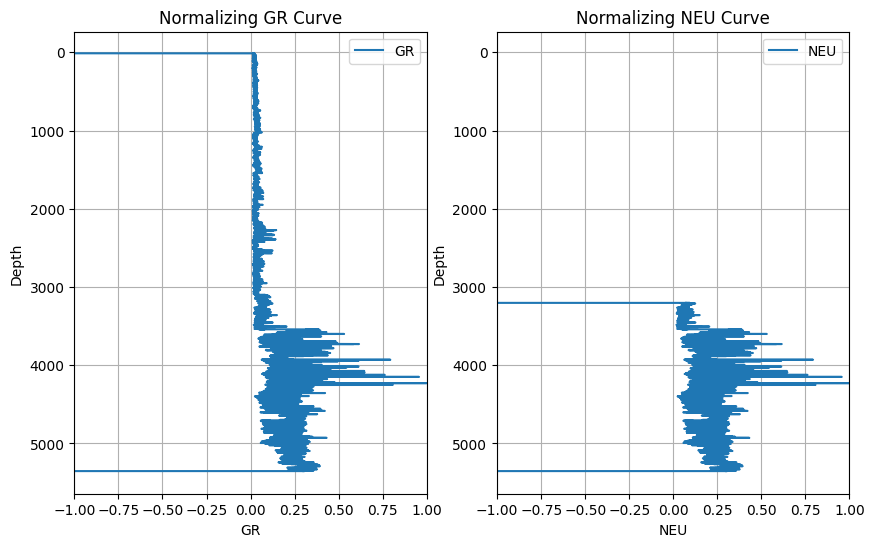

In [35]:
# Extract the specific curve data (e.g., 'GR' for Gamma Ray)
curve_name = "GR"  # Replace 'GR' with the name of the curve you want to plot
curve_name2 = "NEU"
depth = las['MD'] 
curve_data = las[curve_name]
curve_data2 = las[curve_name2]

# Data cleaning for NaN 
curve_data = np.where(np.isnan(curve_data), -9999, curve_data)
curve_data2 = np.where(np.isnan(curve_data2), -9999, curve_data)
#normalizing curve by its maximum values
curve_data = curve_data/np.max(curve_data)
curve_data2 = curve_data2/np.max(curve_data2)

# Plot the specific curve
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(curve_data, depth, label=curve_name)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name} Curve')
plt.xlabel(curve_name)
plt.ylabel('Depth')
plt.xlim(-1.0,1.0)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(curve_data2, depth, label=curve_name2)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name2} Curve')
plt.xlabel(curve_name2)
plt.ylabel('Depth')
plt.xlim(-1.0,1.0)
plt.legend()
plt.grid()
plt.savefig('temp\\well_curves.png', dpi=300, transparent=True)
plt.show()

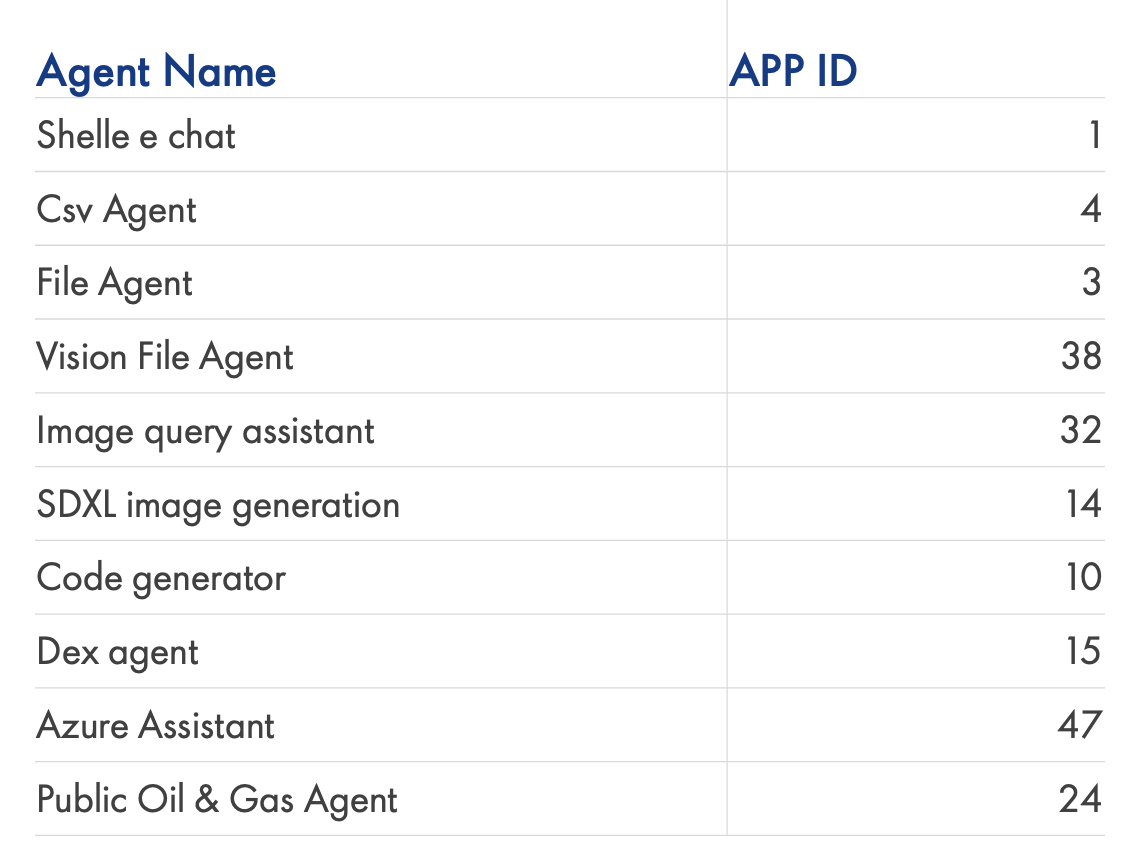

# Test Vision File Agent to see if Shelle can analyze the well log curves

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 38
CLIENT_ID = 'd0782ceb-8ae1-4123-a674-39e62981f33b'
CLIENT_PASS = 'b7f13ccd-0ea7-469b-a222-a41a430450bd'
CLIENT_SECRET = '82b6dd1e-58fe-4363-b75a-0b85179015a8'
SUBSCRIPTION_KEY = 'ea08e1381ab94c779e5c4937ccb6162e'
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_curves.png"     
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)
overrides = {
        "prompt": "Answer every questions with a joke in the end",
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Could you analyze thercurves and tell me about abnormaly and correlation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)
     

None
